**CNN (MNIST DIGIT DATASET)**


Insert Code wherever represented with "#***************#"

# Importing Libraries

In [ ]:
import keras
import cv2
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model


# Data Preprocessing

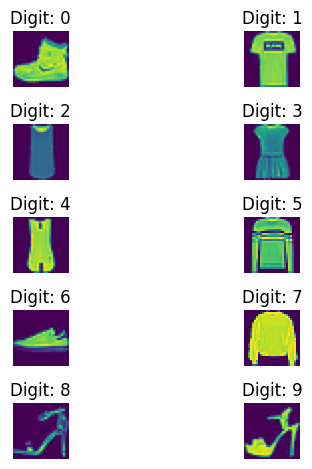

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train= x_train.reshape(60000,28,28)

x_test= x_test.reshape(x_test.shape[0],28,28)

input_shape=(28,28,1)

y_train=keras.utils.to_categorical(y_train,10)

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Digit: {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Build CNN Model

In [ ]:
x_train /= 255
x_test /=255
model = None  #Initialize model here

batch_size = 64
num_classes = 10
epochs = 2

  #****** INSERT MODEL CODE HERE ******

def build_model(optimizer):
    # Initialize a Sequential model
    model = Sequential()

    # Add a Conv2D layer with 32 filters, kernel size (3x3), ReLU activation, and input shape (28, 28, 1)
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

    # Add a MaxPooling layer to downsample the feature maps
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add another Conv2D layer with similar parameters
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

    # Add another MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add a Dropout layer with a rate of 0.25 to reduce overfitting
    model.add(Dropout(0.25))

    # Flatten the 2D feature maps into a 1D vector for the Dense layers
    model.add(Flatten())

    # Add a Dense (fully connected) layer with 256 units and ReLU activation
    model.add(Dense(256, activation='relu'))

    # Add another Dropout layer with a higher rate (0.5) for better regularization
    model.add(Dropout(0.5))

    # Add an output Dense layer with `num_classes` units and softmax activation for classification
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model with categorical crossentropy loss, specified optimizer, and accuracy metric
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

    # Print a summary of the model's architecture
    model.summary()

    return model

#**** call build model with RMSprop and SGDOptimizer Optimizer ****
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

model = build_model('RMSprop')

from keras.utils import plot_model

plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,194 (848.41 KB)

 Trainable params: 217,194 (848.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 48ms/step - accuracy: 0.7118 - loss: 0.7972 - val_accuracy: 0.8462 - val_loss: 0.4129
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.8533 - loss: 0.4057 - val_accuracy: 0.8789 - val_loss: 0.3345


In [ ]:
model = build_model('SGD')

from keras.utils import plot_model

plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217,194 (848.41 KB)

 Trainable params: 217,194 (848.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.3210 - loss: 1.8301 - val_accuracy: 0.7298 - val_loss: 0.7729
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 46ms/step - accuracy: 0.6869 - loss: 0.8466 - val_accuracy: 0.7662 - val_loss: 0.6256


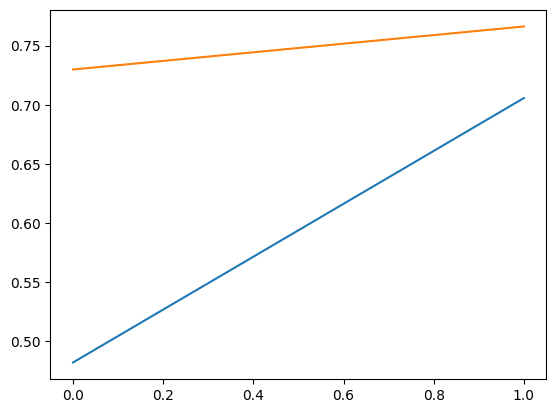

In [ ]:
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

# Predict Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


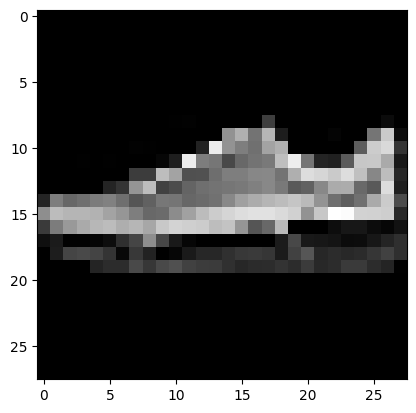

In [ ]:
keras.models.save_model(model, "mnist.h5", save_format="h5")

labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def predict_image(model, img):

  #**** Insert code here ****
  if len(img.shape) == 2:  # If it's a 2D grayscale image
        img = img.reshape(1, 28, 28, 1)  # Add batch and channel dimensions
  elif len(img.shape) == 3:  # If already has channels but needs batch dimension
        img = img.reshape(1, *img.shape)
  else:
        raise ValueError("Input image shape is not valid.")

  # Normalize the image (if required)
  img = img.astype("float32") / 255.0

  # Predict the class
  prediction = model.predict(img)
  predicted_class = np.argmax(prediction, axis=1)[0]

  return predicted_class


m = load_model('/content/mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[9],cmap='gray')
